In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.iloc[:,1:]


In [9]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
encoder = LabelEncoder()


In [12]:
df['Species'] = encoder.fit_transform(df['Species'])


In [13]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]


In [15]:
df.head()


,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


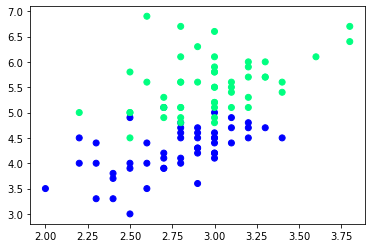

In [17]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')


In [18]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
81,2.4,3.7,1
100,3.3,6.0,2
65,3.1,4.4,1
108,2.5,5.8,2
82,2.7,3.9,1
98,2.5,3.0,1
88,3.0,4.1,1
105,3.0,6.6,2
106,2.5,4.5,2


In [19]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [20]:
df_train


,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
117,3.8,6.7,2
119,2.2,5.0,2
90,2.6,4.4,1
139,3.1,5.4,2
146,2.5,5.0,2
129,3.0,5.8,2
57,2.4,3.3,1
50,3.2,4.7,1
144,3.3,5.7,2


In [21]:
df_val


,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
103,2.9,5.6,2
98,2.5,3.0,1
134,2.6,5.6,2
127,3.0,4.9,2


In [22]:
df_test


,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
109,3.6,6.1,2
99,2.8,4.1,1
108,2.5,5.8,2
61,3.0,4.2,1


In [23]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [24]:
y_test


array([2, 2, 1, 2, 2])

# Case 1 - Bagging 

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
129,3.0,5.8,2
139,3.1,5.4,2
146,2.5,5.0,2
89,2.5,4.0,1
90,2.6,4.4,1
144,3.3,5.7,2
129,3.0,5.8,2


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [27]:
dt_bag1 = DecisionTreeClassifier()


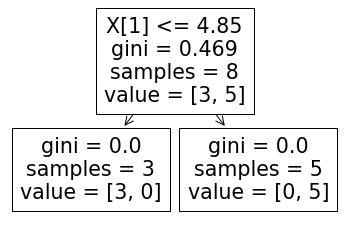

1.0


C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


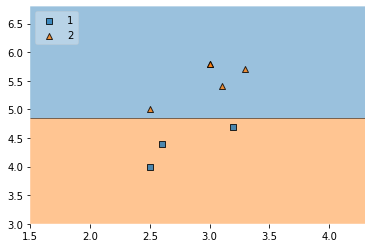

In [30]:
evaluate(dt_bag1,X,y)


In [31]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
146,2.5,5.0,2
119,2.2,5.0,2
119,2.2,5.0,2
129,3.0,5.8,2
57,2.4,3.3,1
57,2.4,3.3,1
144,3.3,5.7,2


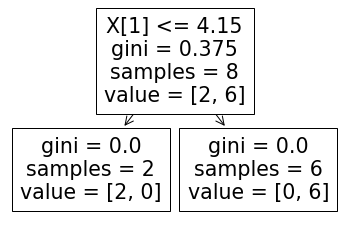

1.0


C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


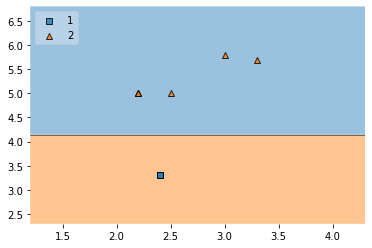

In [32]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [33]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
146,2.5,5.0,2
89,2.5,4.0,1
57,2.4,3.3,1
89,2.5,4.0,1
57,2.4,3.3,1
117,3.8,6.7,2
146,2.5,5.0,2


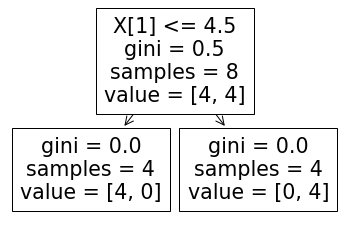

1.0


C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


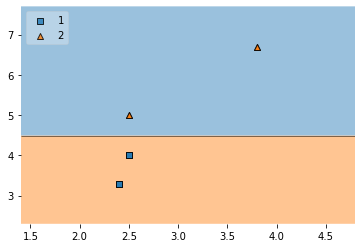

In [34]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [29]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# Predict 

In [35]:
df_test


,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
109,3.6,6.1,2
99,2.8,4.1,1
108,2.5,5.8,2
61,3.0,4.2,1


In [36]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting 

In [37]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
117,3.8,6.7,2
119,2.2,5.0,2
90,2.6,4.4,1
139,3.1,5.4,2
146,2.5,5.0,2
129,3.0,5.8,2
57,2.4,3.3,1
50,3.2,4.7,1
144,3.3,5.7,2


In [38]:
df_train.sample(8)


,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
89,2.5,4.0,1
139,3.1,5.4,2
50,3.2,4.7,1
119,2.2,5.0,2
90,2.6,4.4,1
57,2.4,3.3,1
129,3.0,5.8,2


# Random Subspaces 

In [39]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [40]:
df1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,127,6.2,2.8,4.8,1.8,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [41]:
df1.sample(2,replace=True,axis=1)


,PetalLengthCm,SepalWidthCm
126,4.8,2.8
24,1.9,3.4
127,4.9,3.0
87,4.4,2.3
33,1.4,4.2
95,4.2,3.0
47,1.4,3.2
55,4.5,2.8
50,4.7,3.2
85,4.5,3.4


# Random Patches 

In [42]:
df1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,127,6.2,2.8,4.8,1.8,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [43]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,Id,PetalLengthCm
95,96,4.2
50,51,4.7
127,128,4.9
47,48,1.4
50,51,4.7
95,96,4.2
85,86,4.5
55,56,4.5
